In [511]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [512]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=False, grid=False)

In [513]:
import matplotlib as mpl

In [514]:
# Edit the font, font size, and axes width
# mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 24
plt.rcParams['axes.linewidth'] = 2

In [515]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [516]:
import sys
sys.path.insert(0, '/home/trevormjs/Documents/Science/APL/Lab')

In [517]:
from Helper.plotting import my_graph

#### PV

##### Basic starting measurements

In [518]:
meter_readings = np.array([
    [22.7, 23.9, 24.2, 23.1],
    [22.2, 26.2, 32.9, 26.2]
])

In [519]:
umeter_readings = np.array([
    [ufloat(i, i*.03) for i in j]
    for j in meter_readings
])
umeter_readings

array([[22.7+/-0.6809999999999999, 23.9+/-0.717, 24.2+/-0.726,
        23.1+/-0.6930000000000001],
       [22.2+/-0.6659999999999999, 26.2+/-0.7859999999999999,
        32.9+/-0.9869999999999999, 26.2+/-0.7859999999999999]],
      dtype=object)

In [523]:
true_power = meter_readings/12.5
true_power  # mW
utrue_power = umeter_readings/12.5
utrue_power

array([[1.8159999999999998+/-0.054479999999999994, 1.912+/-0.05736,
        1.936+/-0.05808, 1.848+/-0.05544],
       [1.776+/-0.053279999999999994, 2.096+/-0.06287999999999999,
        2.6319999999999997+/-0.07895999999999999,
        2.096+/-0.06287999999999999]], dtype=object)

In [524]:
uncertainty = true_power.reshape(-1).std()*1e-3

In [612]:
def print_unc(val, unc=[]):
    if isinstance(unc, list):
        val, unc = val.n, val.s
    dig = get_leading_figure(unc)

#     print("{:.{}f} +- {:.{}f}".format(val, dig, unc, dig))
    return np.round(val, dig), np.round(unc, dig), dig

In [538]:
avg_power = true_power.mean().mean()*1e-3
avg_power  # W

0.0020139999999999997

In [537]:
from uncertainties import ufloat
uavg_power = ufloat(avg_power, uncertainty)
print_unc(uavg_power)

0.0002586658075587107
0.0025866580755871072
0.025866580755871074
0.2586658075587107
0.0020 +- 0.0003


(0.002, 0.0003, 4)

In [539]:
meter_area = (9.5e-3/2)**2*np.pi
meter_area  # m^2

7.08821842466197e-05

In [541]:
pvc_dimensions = [0.0985, 0.0785]  # in meters
pvc_area = pvc_dimensions[0]*pvc_dimensions[1]
upvc_dimensions = [ufloat(i, 5e-4) for i in pvc_dimensions]
upvc_area = upvc_dimensions[0]*upvc_dimensions[1]
upvc_area, pvc_area

# single_cell_dimension = []  # in meters
# n_cells = 8
# pvc_area = single_cell_dimension[0] * single_cell_dimension[1] * n_cells

(0.00773225+/-6.297717840614964e-05, 0.00773225)

In [542]:
print_unc(upvc_area)

0.00773 +- 0.00006


(0.00773, 6e-05, 5)

##### Prelim calculations

In [543]:
avg_intensity = uavg_power/meter_area

In [544]:
avg_intensity

28.41334562987942+/-3.6492358454803995

In [545]:
total_avg_light_power = avg_intensity * pvc_area

In [546]:
total_avg_light_power  # Watts
print_unc(total_avg_light_power)

0.02821680386621582
0.2821680386621582
0.22 +- 0.03


(0.22, 0.03, 2)

##### Main test measurements

In [547]:
pv = pd.DataFrame({
    'R': [
        0.1, 3, 10, 30, 70, 100, 150, 300,
        500, 800, 1e3, 5e3, 10e3, 5e4, 8e4, 1e5,
        5e5, 1e6
    ],
    'C': [
        23.77, 23.7, 23.67, 23.52, 21.3, 17.2,
        12.29, 6.49, 3.98, 2.54, 2.05, 0.3886,
        .1971, .03088, .02454, .01957, .00403,
        .00206
    ],
    'V': [
        .02918, .1014, .2645, .7361, 1.529, 1.7444,
        1.8527, 1.9285, 1.9528, 1.9651, 1.97, 1.9816,
        1.9829, 1.9838, 1.9843, 1.9834, 1.9832, 1.985
    ]
})

In [548]:
def make_unc_4(val):
    return get_leading_figure(val) + 4

In [549]:
pv[['uC', 'uV']] = pv[['C', 'V']].apply(
    lambda x: [ufloat(i, 10**-make_unc_4(i)) for i in x.values])

0.3886
0.1971
0.03088
0.3088
0.02454
0.2454
0.01957
0.1957
0.00403
0.040299999999999996
0.40299999999999997
0.00206
0.0206
0.20600000000000002
0.02918
0.2918
0.1014
0.2645
0.7361


##### Analysis

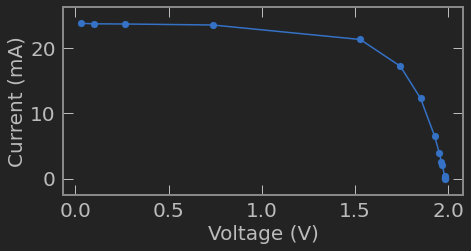

In [560]:
# plt.figure(figsize = (9, 5.5))
# plt.plot(pv.V, pv.C)
# plt.xlabel('V')
# plt.ylabel('I (mA)')
# plt.title('I(V) with varying Resistance')
# plt.savefig("../Images/l1_a_1.png")
# plt.show()
my_graph(pv.V, pv.C, 'linear', 'linear',
         'Voltage (V)', 'Current (mA)', "l1_a_1", 'linear')

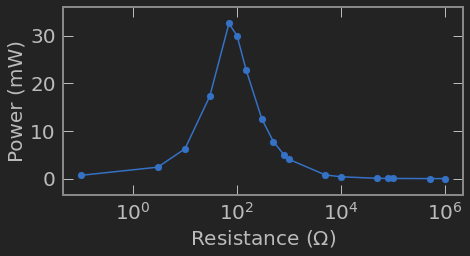

In [562]:
my_graph(pv.R, pv.C*pv.V, 'log', 'linear',
         r'Resistance ($\mathregular{\Omega}$)', 'Power (mW)', 'l1_a_2', 'linear')

##### Results

In [563]:
P = pv.V*pv.C  # power in mW
uP = pv.uV*pv.uC  # power in mW

In [564]:
# quick aside to interpolate the peak just for fun

In [565]:
from scipy.interpolate import interp1d

In [645]:
lmax = np.where(P == P.max())[0][0]

In [649]:
pv.loc[lmax], P[lmax]

(R                    70
 C                  21.3
 V                 1.529
 uC     21.3000+/-0.0010
 uV    1.52900+/-0.00010
 Name: 4, dtype: object,
 32.5677)

In [567]:
inds = [lmax - 1, lmax, lmax + 1, lmax + 2]

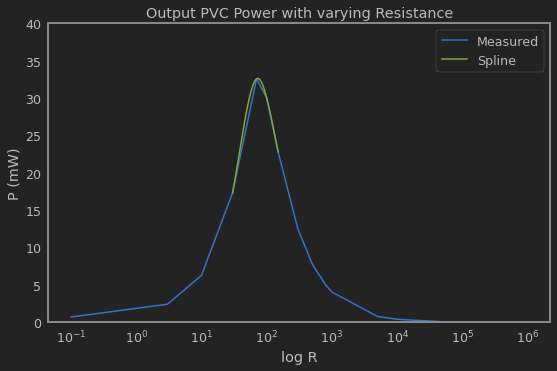

TypeError: my_graph() missing 3 required positional arguments: 'ylabel', 'name', and 'interp'

In [568]:
plt.figure(figsize=(9, 5.5))
plt.plot(pv.R, pv.V*pv.C, label='Measured')
inp = np.log10(pv.R[inds])
interp = interp1d(np.log10(pv.R), P, 'cubic')
x = np.linspace(inp.min(), inp.max(), 1000)
y = interp(x)
plt.plot(10**x, y, label='Spline')
plt.legend()
plt.xscale('log')
plt.xlabel('log R')
plt.ylabel('P (mW)')
plt.ylim([0, 40])
plt.title('Output PVC Power with varying Resistance')
plt.savefig("../Images/l1_b_1.png")
plt.show()
my_graph(pv.R, pv.V*pv.C, 'log', 'linear',
         r'Resistance ($\mathregular{\Omega}$)',)

In [571]:
max_p_e = (uP).max()*1e-3

In [644]:
max_p_e

0.032567700000000005+/-2.621972730598089e-06

In [572]:
max_p_e/total_avg_light_power

0.1482377543806974+/-0.0190387517283863

In [573]:
# n_pv = P_E/P_L
f"{print_unc(max_p_e/total_avg_light_power * 100)[:2]} % Efficiency"

15 +- 2


'(15.0, 2.0) % Efficiency'

#### Part C

#####  starting values

In [574]:
vol = 5  # cm^3
HHV = 1.42e8
LHV = 1.20e8  # J/kg
M_H2 = 2.01e-3

##### measurements

In [635]:
res = pd.DataFrame({
    't': [ufloat(112.5, 3)],
    'V': [1.892],
    'I': [0.3215],
    'Volume': [ufloat(5, .3)],
})

##### Results

In [636]:
res.insert(3, 'P', res.V*res.I)
res.insert(4, 'E', res.P*res.t)

In [637]:
res['umass'] = 2.015e-3 * 101300 * res['Volume'] * 1e-6 / 8.314 / 293

In [638]:
res['uE_EL'] = (res['t'] * res['P'])
res['uE_H'] = res['umass'] * HHV

In [639]:
rohms

'Resistance ($\\mathregular{\\Omega}$)'

In [642]:
res['Efficiency'] = res['uE_H']/res['uE_EL']

In [643]:
res

,t,V,I,P,E,Volume,umass,uE_EL,uE_H,,Efficiency
0,112.5+/-3.0,1.892,0.3215,0.608278,68.4+/-1.8,5.00+/-0.30,(4.19+/-0.25)e-07,68.4+/-1.8,59+/-4,0.87+/-0.06,0.87+/-0.06


### Part D

#### Trial 1

In [583]:
res = pd.DataFrame([
    [1, 0.079, 62.3, 0.0623, 0.0049217],
    [3, 0.1942, 59.9, 0.0599, 0.01163258],
    [3, 0.29, 88, 0.088, 0.02552],
    [4, 0.505, 95.5, 0.0955, 0.0482275],
    [5, 0.545, 86.4, 0.0864, 0.047088],
    [7, 0.483, 58.6, 0.0586, 0.0283038],
    [7, 0.4343, 52.7, 0.0527, 0.02288761],
    [10, 0.496, 49.5, 0.0495, 0.024552],
    [30, 0.626, 21.6, 0.0216, 0.0135216],
    [100, 0.71, 7.9, 0.0079, 0.005609],
    [300, 0.774, 3.5, 0.0035, 0.002709],
    [1000, 0.83, 1.73, 0.00173, 0.0014359],
    [3000, 0.855, 0.294, 0.000294, 0.00025137],
    [10000, 0.872, 0.096, 0.000096, 0.000083712]],
    columns=['R', 'V', 'I', 'I(A)', 'P'],
)

In [584]:
res

,R,V,I,I(A),P
0,1,0.0790,62.300,0.062300,0.004922
1,3,0.1942,59.900,0.059900,0.011633
2,3,0.2900,88.000,0.088000,0.025520
3,4,0.5050,95.500,0.095500,0.048227
4,5,0.5450,86.400,0.086400,0.047088
5,7,0.4830,58.600,0.058600,0.028304
6,7,0.4343,52.700,0.052700,0.022888
7,10,0.4960,49.500,0.049500,0.024552
8,30,0.6260,21.600,0.021600,0.013522
9,100,0.7100,7.900,0.007900,0.005609


In [585]:
import seaborn as sns
from scipy.optimize import curve_fit

In [586]:
rohms = r'Resistance ($\mathregular{\Omega}$)'

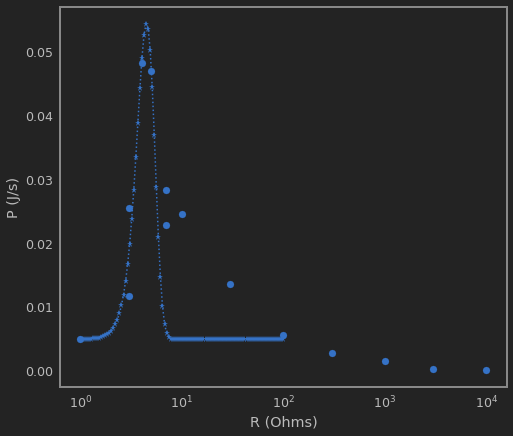

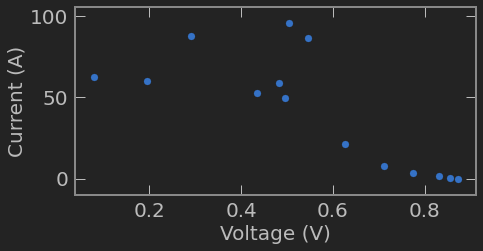

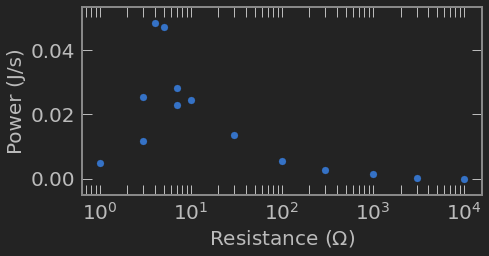

In [588]:
n = sum(res.P[:5])
mean = sum(res.R[:5]*res.P[:5])/n
sigma = np.sqrt(sum(res.P[:5]*(res.R[:5]-mean)**2)/n)


def gaus(x, a, x0, sigma, offset):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + offset


popt, pcov = curve_fit(gaus, res.R[:5], res.P[:5], p0=[1, mean, sigma, 0.0])

plt.scatter(res.R, res.P)
plt.plot(10**np.linspace(0, 2, 100),
         gaus(10**np.linspace(0, 2, 100), *popt), 'b*:', label='fit')
plt.xscale('log')
plt.xlabel('R (Ohms)')
plt.ylabel('P (J/s)')
plt.show()
my_graph(res.V, res.I, 'linear', 'linear', 'Voltage (V)',
         'Current (A)', 'l1_d_1_trial_a', '')
my_graph(res.R, res.P, 'log', 'linear',  rohms,
         'Power (J/s)', 'l1_d_2_trial_a', '')

#### Trial 2

##### Phase 1

In [589]:
res = pd.DataFrame({
    'R': [
        1, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30,
        60, 100, 500, 1000, 5000, 10000, 50000,
        100000, 500000, 1e6,
    ],
    'V': [
        0.0560, 0.1256, 0.165, 0.12036, 0.2432,
        0.2815, 0.3544, 0.3881, 0.4162, 0.5479,
        0.6281, 0.7195, 0.7844, 0.8332, 0.8813,
        0.9007, 0.9156, 0.9220, 0.9267, 0.9272,
        0.9279, 0.9280,
    ],
    'I': [
        0.049, 0.0405, 0.040, 0.040, 0.0394,
        0.0398, 0.0385, 0.03826, 0.03761, 0.0346,
        0.02996, 0.02293, 0.0123, 0.00831, 1.85e-3,
        8.9e-4, .1802e-3, 84.04e-6, 18.21e-6, 9.25e-6,
        1.94e-06, 1.01e-6
    ]
})
res.insert(3, 'P', res.V*res.I)
res

,R,V,I,P
0,1.0,0.05600,0.049000,2.744000e-03
1,3.0,0.12560,0.040500,5.086800e-03
2,4.0,0.16500,0.040000,6.600000e-03
3,5.0,0.12036,0.040000,4.814400e-03
4,6.0,0.24320,0.039400,9.582080e-03
5,7.0,0.28150,0.039800,1.120370e-02
6,8.0,0.35440,0.038500,1.364440e-02
7,9.0,0.38810,0.038260,1.484871e-02
8,10.0,0.41620,0.037610,1.565328e-02
9,15.0,0.54790,0.034600,1.895734e-02


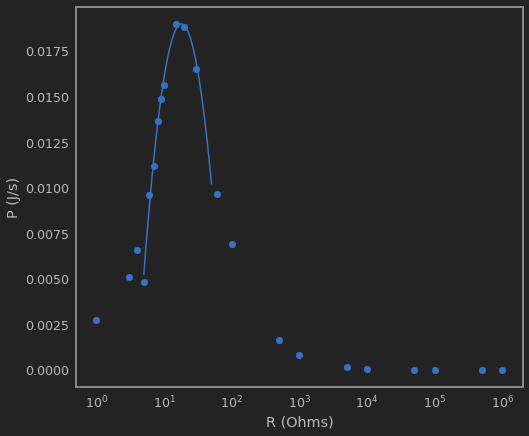

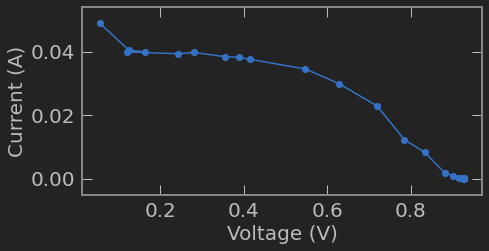

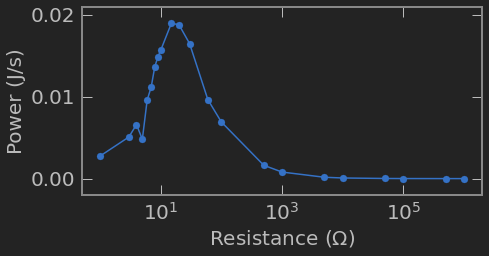

In [590]:
fit = np.polyfit(np.log10(res.R[3:11]), res.P[3:11], 2)
x = np.linspace(.7, 1.7, 110)
plt.plot(10**x, fit[0]*x**2 + fit[1]*x + fit[2])
plt.scatter(res.R, res.P)
plt.xscale('log')
plt.xlabel('R (Ohms)')
plt.ylabel('P (J/s)')
plt.show()
my_graph(res.V, res.I, 'linear', 'linear', 'Voltage (V)',
         'Current (A)', 'l1_d_1_trial_b', 'linear')
my_graph(res.R, res.P, 'log', 'linear',  rohms,
         'Power (J/s)', 'l1_d_2_trial_b', 'linear')

In [591]:
"""
This value below corresponds to the difference in measured power at 15 ohms
when zipping up through the resistance quickly and sitting at that resistance
for some time. The power was 1/4.4 the size when resting.
"""
res.loc[res.P == res.P.max(), 'P']/(.2629*16.32e-3)

9    4.418417
Name: P, dtype: float64

##### Phase 2

In [651]:
res = pd.DataFrame({
    'R': [
        15, 10, 7, 9
    ],
    'Volume': [
        3, 3, 5, 5
    ],
    'T': [
        467.26, 8*60+19.78, 10*60 + 49.57, 60*9 + 57.19
    ],
    'I': [
        16.24e-3, 50.86e-3, 56.22e-3, 53.57e-3
    ],
    'V': [
        .2616, .586, 0.4658, 0.5462
    ]
})
res['P'] = res['I'] * res['V']

In [652]:
res

,R,Volume,T,I,V,P
0,15,3,467.26,0.01624,0.2616,0.004248
1,10,3,499.78,0.05086,0.5860,0.029804
2,7,5,649.57,0.05622,0.4658,0.026187
3,9,5,597.19,0.05357,0.5462,0.029260


(0.027, 0.03)

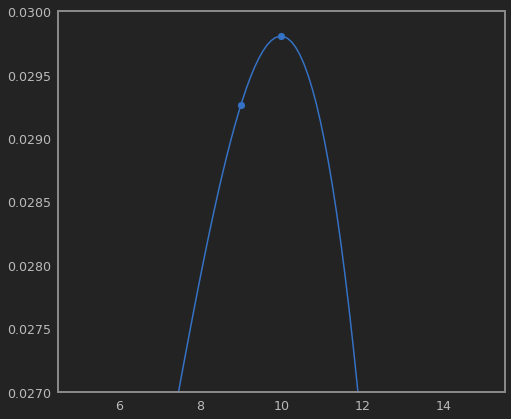

In [653]:
plt.scatter(res['R'], res['P'])
fit = np.polyfit(res['R'], res['P'], 3)
x = np.linspace(5, 15, 100)
plt.plot(x, x**3*fit[0] + x**2*fit[1] + x*fit[2] + fit[3])
# plt.xscale('log')
plt.ylim([.027, .03])

$ \eta_{FC} = \frac{E_{FC}}{E_{Hydrogen}}  = \frac{P_{FC} \cdot t_{FC}}{V_H \cdot LHV} $

$ cm^3 $ to kilograms

$ V_H cm^3 \cdot \sigma \frac{g}{L} $

$ V_H cm^3 \cdot \frac{1 L}{1000 cm^3} \cdot \sigma 
\frac{g}{L} \cdot \frac{1 kg}{1000\ g} = m\ (kg) $

In [654]:
h_density = 0.08988  # g/L

In [655]:
res['uVolume'] = res['Volume'].apply(lambda x: ufloat(x, .3))

In [656]:
res['uT'] = res['T'].apply(lambda x: ufloat(x, 5))

In [657]:
res['mass'] = res['Volume'] * 1e-3 * h_density * 1/1000
res['umass'] = res['uVolume'] * 1e-3 * h_density * 1/1000
res

,R,Volume,T,I,V,P,uVolume,uT,mass,umass
0,15,3,467.26,0.01624,0.2616,0.004248,3.00+/-0.30,467+/-5,2.696400e-07,(2.70+/-0.27)e-07
1,10,3,499.78,0.05086,0.5860,0.029804,3.00+/-0.30,500+/-5,2.696400e-07,(2.70+/-0.27)e-07
2,7,5,649.57,0.05622,0.4658,0.026187,5.00+/-0.30,650+/-5,4.494000e-07,(4.49+/-0.27)e-07
3,9,5,597.19,0.05357,0.5462,0.029260,5.00+/-0.30,597+/-5,4.494000e-07,(4.49+/-0.27)e-07


In [658]:
res['umass'] = 2.015e-3 * 101300 * res['uVolume'] * 1e-6 / 8.314 / 293

In [659]:
res['E_FC'] = (res['T'] * res['P'])
res['E_H'] = res['mass'] * LHV
res['uE_FC'] = (res['uT'] * res['P'])
res['uE_H'] = res['umass'] * LHV

In [660]:
rohms

'Resistance ($\\mathregular{\\Omega}$)'

In [663]:
res.insert(res.shape[1], 'efficiency', res['E_FC']/res['E_H'])

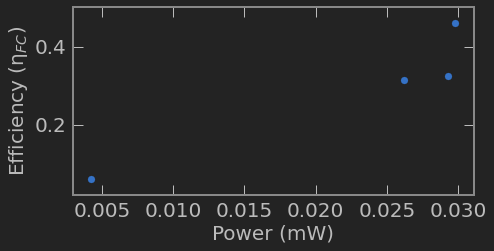

In [599]:
y = res['E_FC']/res['E_H']
my_graph(res.P[y.sort_values().index],
         y.sort_values(),
         'linear',
         'linear',
         'Power (mW)',
         'Efficiency ($\\mathregular{\\eta}_{FC}$)',
         'l1_d_3',
         ''
        )

In [600]:
y.max()

0.46034908052712253

In [666]:
res[['R', 'Volume', 'T', 'I', 'V','P']].to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &   R &  Volume &       T &        I &       V &         P \\\\\n\\midrule\n0 &  15 &       3 &  467.26 &  0.01624 &  0.2616 &  0.004248 \\\\\n1 &  10 &       3 &  499.78 &  0.05086 &  0.5860 &  0.029804 \\\\\n2 &   7 &       5 &  649.57 &  0.05622 &  0.4658 &  0.026187 \\\\\n3 &   9 &       5 &  597.19 &  0.05357 &  0.5462 &  0.029260 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [667]:
res

,R,Volume,T,I,V,P,uVolume,uT,mass,umass,E_FC,E_H,uE_FC,uE_H,efficiency
0,15,3,467.26,0.01624,0.2616,0.004248,3.00+/-0.30,467+/-5,2.696400e-07,(2.51+/-0.25)e-07,1.985100,32.3568,1.985+/-0.021,30.2+/-3.0,0.061350
1,10,3,499.78,0.05086,0.5860,0.029804,3.00+/-0.30,500+/-5,2.696400e-07,(2.51+/-0.25)e-07,14.895423,32.3568,14.90+/-0.15,30.2+/-3.0,0.460349
2,7,5,649.57,0.05622,0.4658,0.026187,5.00+/-0.30,650+/-5,4.494000e-07,(4.19+/-0.25)e-07,17.010469,53.9280,17.01+/-0.13,50.3+/-3.0,0.315429
3,9,5,597.19,0.05357,0.5462,0.029260,5.00+/-0.30,597+/-5,4.494000e-07,(4.19+/-0.25)e-07,17.473740,53.9280,17.47+/-0.15,50.3+/-3.0,0.324020


In [618]:
(res['uE_FC']/res['uE_H']).sort_values().apply(print_unc)

0.0066182827970625024
0.06618282797062502
0.6618282797062502
0.020467001314352588
0.20467001314352587
0.021055554490968364
0.21055554490968365
0.049625634045081905
0.49625634045081907


0    (0.066, 0.007, 3)
2      (0.34, 0.02, 2)
3      (0.35, 0.02, 2)
1      (0.49, 0.05, 2)
dtype: object